In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [19]:
# Load the Excel file
file_path = '../data/diabetes_study_final_data.csv'
df = pd.read_csv(file_path, delimiter=',')

In [21]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('GeneticFactor', axis=1)
y = df.GeneticFactor
one_hot_X = pd.get_dummies(X)

# make a train-test split of the data:
X_train, X_test, y_train, y_test = train_test_split(one_hot_X, y, test_size=0.2)

# (limit to depth 2 for better readability of the model) -> ok it's a bit radical, but we want to really see
# what is most important...
dtree = DecisionTreeClassifier(max_depth=2)

# train Decision Tree classifer
dtree = dtree.fit(X_train,y_train)

In [22]:
# Display the first few rows of the dataframe
df.head()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
0,56,0,1,18.303039,91.118631,0.000000,0.0
1,69,0,4,28.052368,108.830756,0.301111,0.0
2,46,1,4,30.947376,91.569805,0.000000,0.0
3,32,1,0,26.874690,98.878487,0.301111,0.0
4,60,1,3,28.052368,90.062769,0.000000,0.0


In [23]:
df.describe()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000
mean,50.323333,0.480000,1.884444,28.043167,105.123772,0.301999,0.15000
std,18.401072,0.499878,1.401565,3.797263,14.347632,0.436115,0.35727
min,18.000000,0.000000,0.000000,15.921951,70.000000,0.000000,0.00000
25%,35.000000,0.000000,1.000000,25.804268,96.193273,0.000000,0.00000
50%,50.000000,0.000000,2.000000,28.052368,105.053928,0.000000,0.00000
75%,66.000000,1.000000,3.000000,30.368999,113.804479,1.000000,0.00000
max,80.000000,1.000000,4.000000,40.772430,140.000000,1.000000,1.00000


In [24]:
# Check for missing values
pd.isnull(df).any()

Age                  False
Gender               False
Ethnicity            False
BMI                  False
BloodSugarLevel      False
InsulinResistance    False
GeneticFactor        False
dtype: bool

In [25]:
# Shows the data types of each column.
print(df.dtypes)

Age                    int64
Gender                 int64
Ethnicity              int64
BMI                  float64
BloodSugarLevel      float64
InsulinResistance    float64
GeneticFactor        float64
dtype: object


In [26]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Age: 63
Number of distinct types in Gender: 2
Number of distinct types in Ethnicity: 5
Number of distinct types in BMI: 816
Number of distinct types in BloodSugarLevel: 797
Number of distinct types in InsulinResistance: 3
Number of distinct types in GeneticFactor: 2


In [27]:
# Impute Insulin Resistance with kNN

from sklearn.neighbors import KNeighborsClassifier
# Replace non-0/1 values with NaN for the InsulinResistance column
df['InsulinResistance'] = df['InsulinResistance'].apply(lambda x: x if x in [0, 1] else np.nan)

# Separate the rows with NaN values in 'InsulinResistance'
df_missing = df[df['InsulinResistance'].isna()]
df_complete = df.dropna(subset=['InsulinResistance'])

# Features and target for KNN
X = df_complete.drop(columns='InsulinResistance')
y = df_complete['InsulinResistance']

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

# Predict the missing values
df_missing['InsulinResistance'] = knn.predict(df_missing.drop(columns='InsulinResistance'))

# Combine the datasets
df_combined = pd.concat([df_complete, df_missing]).sort_index()

# Check for a certain value in the 'InsulinResistance' column
value_to_check = 0.3011111111111111
exists = value_to_check in df_combined['InsulinResistance'].values

print(f"Does the value {value_to_check} exist in 'InsulinResistance' column? {exists}")
df = df_combined

Does the value 0.3011111111111111 exist in 'InsulinResistance' column? False



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Age: 63
Number of distinct types in Gender: 2
Number of distinct types in Ethnicity: 5
Number of distinct types in BMI: 816
Number of distinct types in BloodSugarLevel: 797
Number of distinct types in InsulinResistance: 2
Number of distinct types in GeneticFactor: 2


In [29]:
# Calculate the mean of the 'InsulinResistance' column
mean_value = df['GeneticFactor'].mean()

# Drop rows where 'InsulinResistance' equals the mean value
df = df[df['GeneticFactor'] != mean_value]

In [30]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Age: 63
Number of distinct types in Gender: 2
Number of distinct types in Ethnicity: 5
Number of distinct types in BMI: 816
Number of distinct types in BloodSugarLevel: 797
Number of distinct types in InsulinResistance: 2
Number of distinct types in GeneticFactor: 2


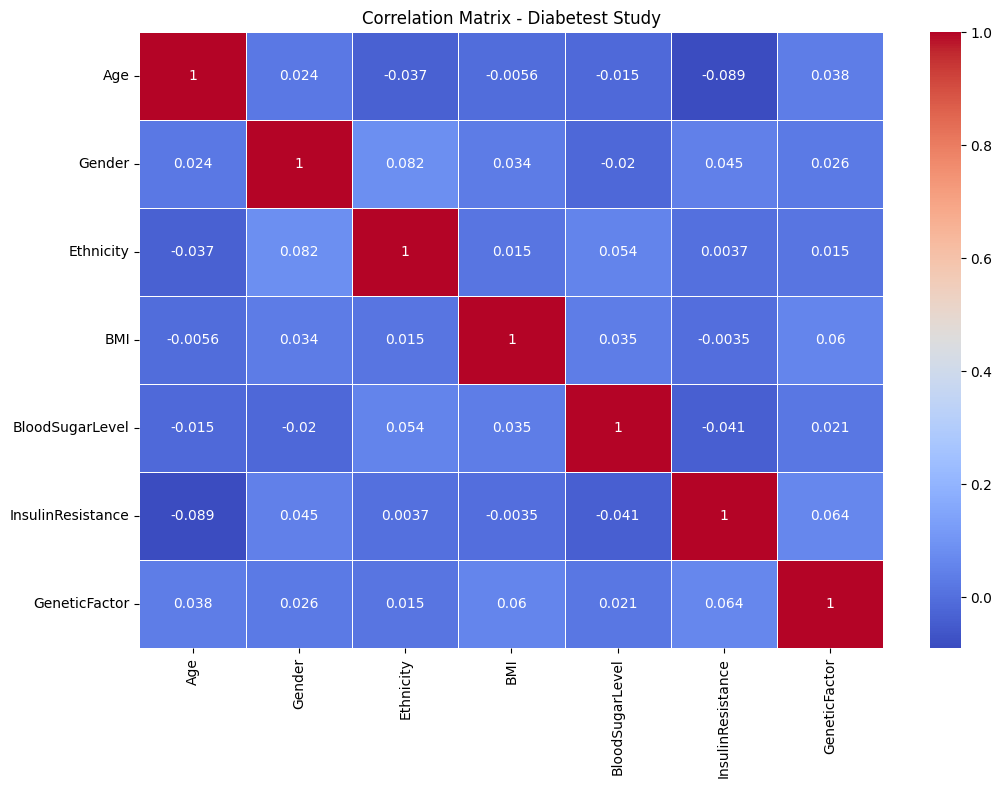

In [31]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Diabetest Study')
plt.show()

In [32]:
#df.loc[:, 'BMI'] = (df['BMI'] * 100).astype(int)
#df.loc[:, 'BloodSugarLevel'] = (df['BloodSugarLevel'] * 100).astype(int)
df.loc[:, 'BloodSugarLevel'] = (df['BloodSugarLevel']).astype(int)
df.loc[:, 'BMI'] = (df['BMI']).astype(int)

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('GeneticFactor', axis=1)
y = df.GeneticFactor
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



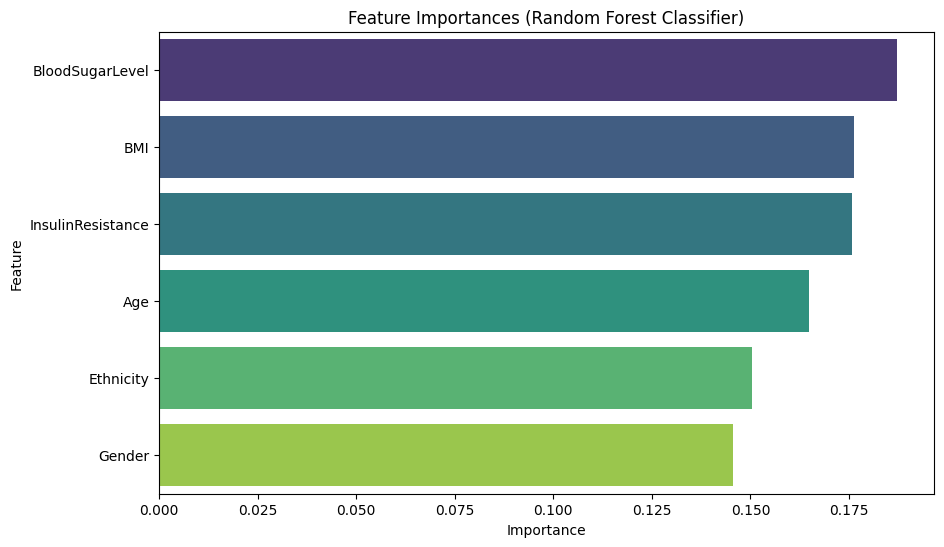

[22:09:22] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


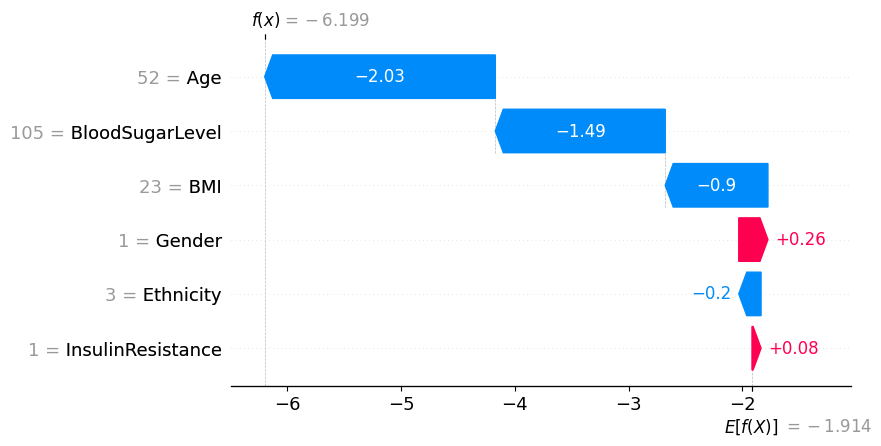

In [34]:
import xgboost as xgb
import shap

model = xgb.XGBClassifier()
model.fit(training_features.values, training_target.values)

# Get feature importances from the trained model
feature_importances = model.feature_importances_
xgb.XGBClassifier
# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': training_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()

expl = shap.TreeExplainer(model)
vals = expl(testing_features)
shap.plots.waterfall(vals[0])

In [35]:
# TPOT



# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=1, population_size=1, verbosity=2, random_state=42, scoring='balanced_accuracy')
tpot.fit(training_features, training_target)
print(tpot.score(testing_features, testing_target))
tpot.export('tpot_diabetes_pipeline_classifier.py')

                                                                          
Generation 1 - Current best internal CV score: 0.501070611310886
                                                                          
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=6, max_features=0.1, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.6000000000000001)
0.5045726637845028


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: 0.6226522828811157

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.01, max_depth=4, min_child_weight=6, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)),
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.01, max_depth=9, min_child_weight=13, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)),
    RobustScaler(),
    BernoulliNB(alpha=10.0, fit_prior=False)
)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, classification_report
print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))
print('Training accuracy:', exported_pipeline.score(training_features, training_target))
print('Testing accuracy:', accuracy_score(testing_target, results))



[[101  93]
 [ 17  14]]
              precision    recall  f1-score   support

         0.0       0.86      0.52      0.65       194
         1.0       0.13      0.45      0.20        31

    accuracy                           0.51       225
   macro avg       0.49      0.49      0.43       225
weighted avg       0.76      0.51      0.59       225

Training accuracy: 0.6311111111111111
Testing accuracy: 0.5111111111111111


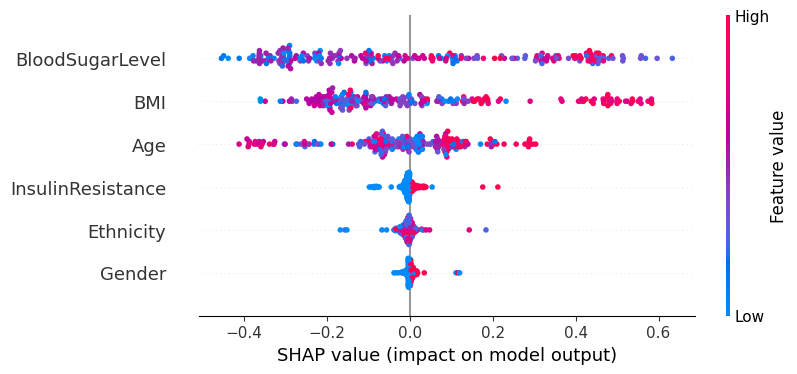

In [38]:
# SHAP
import shap

explainer = shap.Explainer(exported_pipeline.predict, training_features)
shap_values = explainer(testing_features)

# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



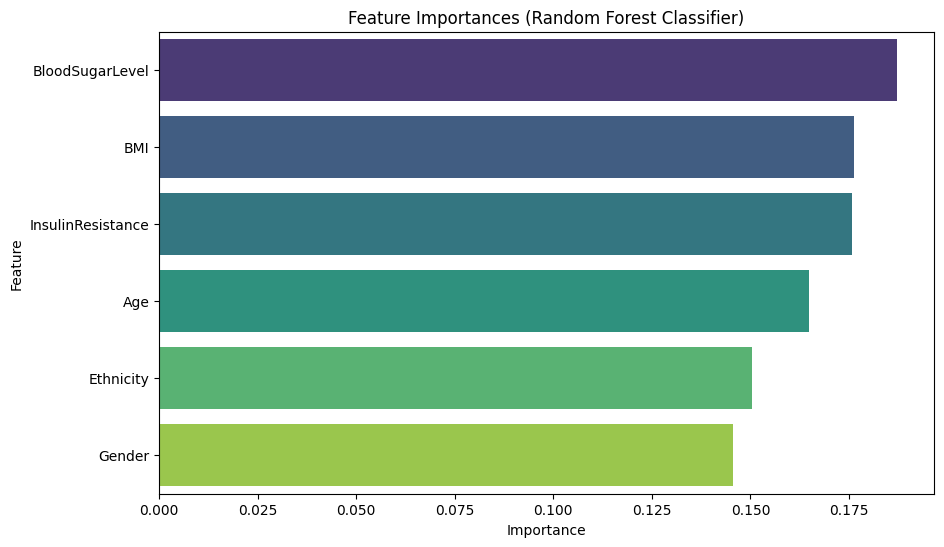

[22:09:29] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


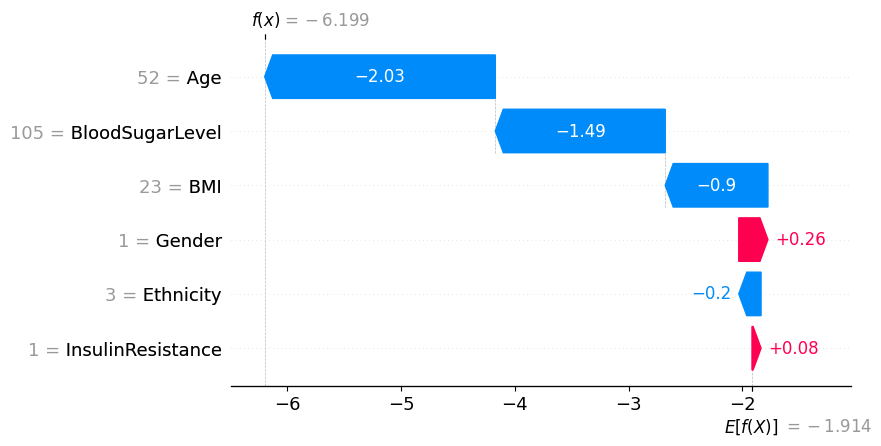

In [39]:
# Get feature importances from the trained model

# Create a DataFrame for visualizing feature importance
features = pd.DataFrame({
    'Feature': training_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.title('Feature Importances (Random Forest Classifier)')
plt.show()

expl = shap.TreeExplainer(model)
vals = expl(testing_features)
shap.plots.waterfall(vals[0])

In [40]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('GeneticFactor', axis=1)
y = df.GeneticFactor
one_hot_X = pd.get_dummies(X)

# make a train-test split of the data:
X_train, X_test, y_train, y_test = train_test_split(one_hot_X, y, test_size=0.2)

# (limit to depth 2 for better readability of the model) -> ok it's a bit radical, but we want to really see
# what is most important...
dtree = DecisionTreeClassifier(max_depth=2)

# train Decision Tree classifer
dtree = dtree.fit(X_train,y_train)

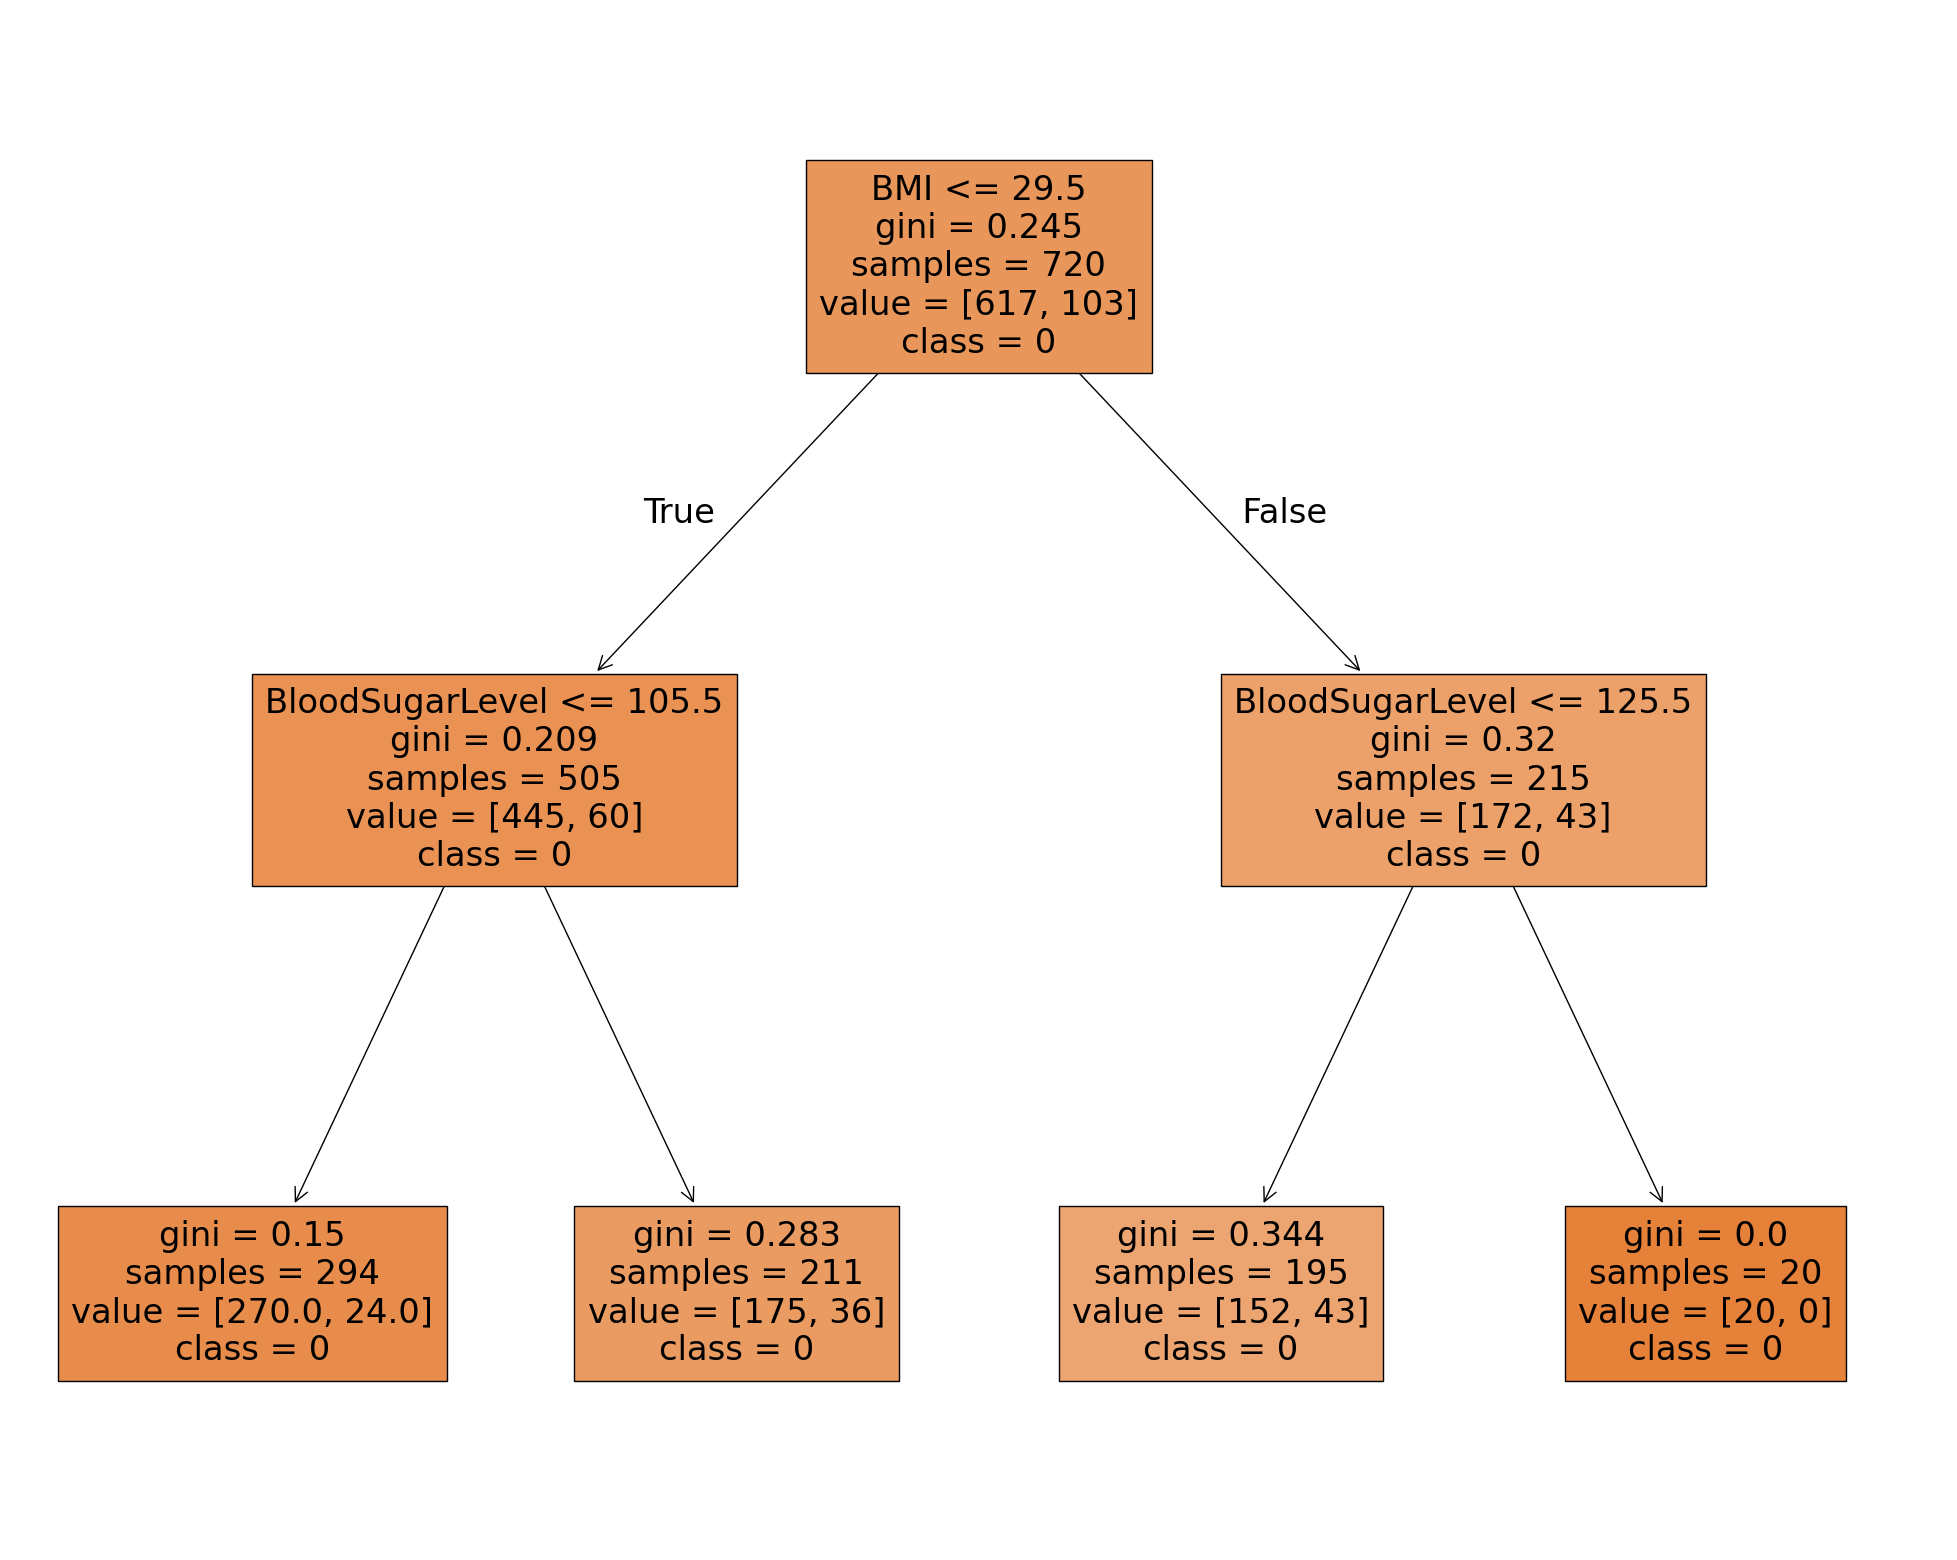

In [41]:
from sklearn import tree

# plot the tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, feature_names=df.columns.values.tolist(), class_names=['0','1'], filled=True)